# Implementation of polynomial linear regression algorithm using python

Prepared by : Swaminathan Ayyappan 

Email : swamynathanayyappan@gmail.com

LinkedIn : linkedin.com/in/swaminathan-ayyappan-60b685175/

Concept of Polynomial regression:

              As like linear regression the concept of polynomial regression is similar to linear regression but instead of having a straight line from visualization the polynomial regression involves in forming a curve that's the diiference between linear and polynomial regresion.

Problem description:
                
                You have been provided with an dataset that contains employees salary based on their level,consider that an a very famous Multinational corporation has been appointed you as a data scientist in this scenario if that company is  hiring an experienced employee to their concern, he/she is saying that they had been given $160k+ as their salary with  an experience of 6.5 years in their past working company , such that your company is raising a question that to verify    that the new recruited employee is telling truth or bluff.
                
And the data set contains :

i)Position - Working position of the employee.

ii)Level - Their working level based on their position.

iii)Salary - Their respective salary based upon their level

The dataset for this project is already posted on the github repository..

In [1]:
"""
i)Pandas - Used for handling dataset.

ii)numpy - stands for numerical python to handle arrays.

iii)matplotlib - To visualize our dataset and here 'pyplot' refers to making of statistical plots.

iv)seaborn - Advanced visualization library than matplotlib helps to visualize the dataset.

Note :

The %matplotlib inline helps to visualize the plots within the notebook itself.

"""
#Importing libraries like pandas,numpy,matplotlib and seaborn and their explanations are given above.
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns  
%matplotlib inline  

In [2]:
#Importing the datset into a single variable (salary_pos) with the help of pandas
salary_pos=pd.read_csv('F:/STUDY MATERIALS/[FreeCourseSite.com] Udemy - Machine Learning A-Z™ Hands-On Python & R In Data Science/Datasets/Machine Learning A-Z New/Part 2 - Regression/Section 6 - Polynomial Regression/Position_Salaries.csv')

# Exploratory Data Analysis (EDA) :

In [3]:
#Viewing the first five entries of the salary_pos dataset.
salary_pos.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
#provides entire information of the salary_pos dataset.
salary_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
#given entire description of the numerical values of the salary dataset.
#Provides the occurence,mean,standard deviation,minimum,maximum,and interquartile ranges (25% , 50%, 75%) of salary dataset attributes.
salary_pos.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
#Viewing the last five entries in the dataset.
salary_pos.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
#Displaying the column names / attributes of the salary_pos dataset 
salary_pos.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [8]:
#To know about the number of rows and columns in the salary_pos dataset 
salary_pos.shape

(10, 3)

In [9]:
#To verify any null values present in the salary_pos dataset 
salary_pos.isna().any()

Position    False
Level       False
Salary      False
dtype: bool

In [10]:
#To know about the each value's presence in the particular column (Position) of the salary_pos dataset.
salary_pos['Position'].value_counts()

Senior Consultant    1
C-level              1
Partner              1
Business Analyst     1
CEO                  1
Region Manager       1
Junior Consultant    1
Country Manager      1
Manager              1
Senior Partner       1
Name: Position, dtype: int64

In [11]:
#To know about the each value's presence in the particular column (Level) of the salary_pos dataset.
salary_pos['Level'].value_counts()

10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
2     1
1     1
Name: Level, dtype: int64

In [12]:
#To know about the each value's presence in the particular column (Salary) of the salary_pos dataset.
salary_pos['Salary'].value_counts()

150000     1
60000      1
300000     1
200000     1
45000      1
110000     1
500000     1
1000000    1
80000      1
50000      1
Name: Salary, dtype: int64

In [13]:
#To understand about the correlation between each attributes in the salary_pos dataset.
salary_pos.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


# Data visualization

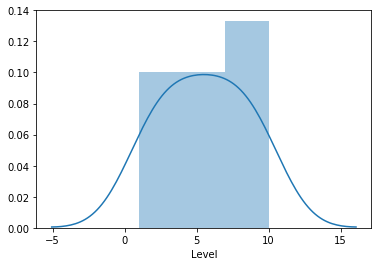

In [14]:
#To create a ditance plot of the Level column in the salary_pos dataset.
sns.distplot(salary_pos['Level'])
plt.show()

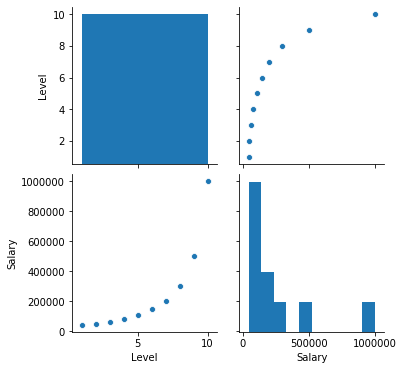

In [15]:
#To create a pair plot of the every numerical columns in the salary_pos dataset.
sns.pairplot(salary_pos)
plt.show()

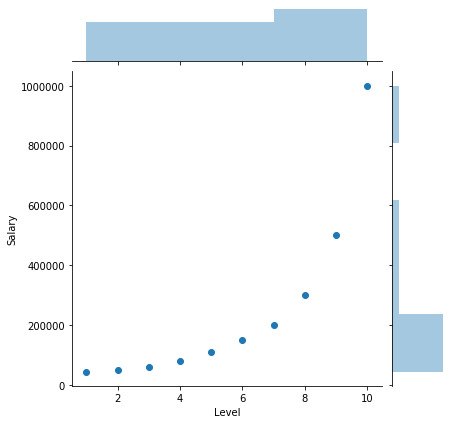

In [16]:
#Visualizizng Level and Salary columns together from the salary_pos dataset.
#As said it forms a curve which represents it is a non linear.
sns.jointplot('Level','Salary',data=salary_pos)
plt.show()

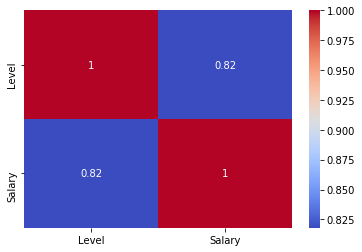

In [17]:
#To visualize the correlation of the attributes present inside the salary_pos dataset using a heatmap.
sns.heatmap(salary_pos.corr(),cmap='coolwarm',annot=True)
plt.show()

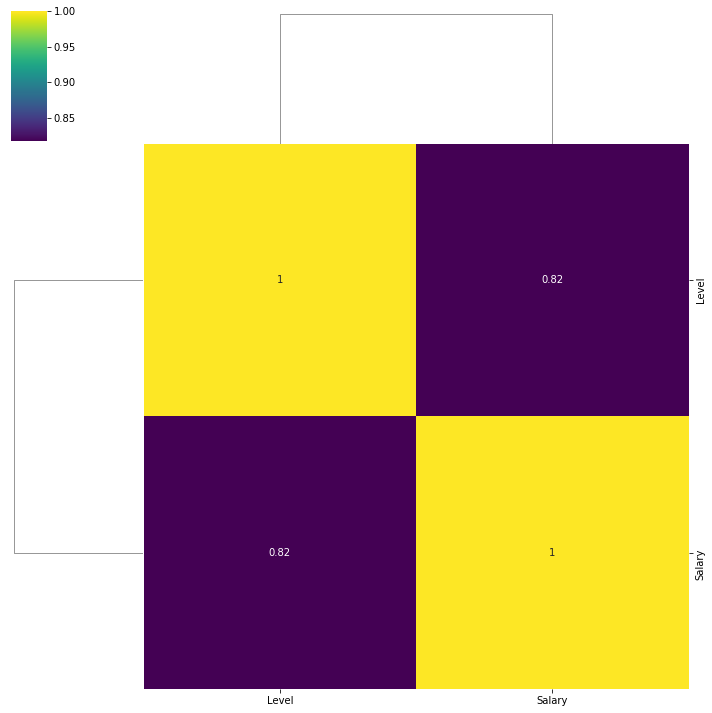

In [18]:
#To visualize the correlation of the attributes present inside the salary_pos dataset using a clustermap.
sns.clustermap(salary_pos.corr(),cmap='viridis',annot=True)
plt.show()

# Dependent and Independent variable allocation

Inorder to execute Machine learning algorithm we want to seperate the dependent and independent values in the dataset

where,

X->Independent variable

y->Dependent variable

So in our datset the 'Salary' is purely dependent on the 'Level' so in this case we need to allocate Level for X variable and Salary for y variable.

In [19]:
X=salary_pos.iloc[:,[1]] # 2 Dimensional array that holds the value of Level from the dataset.
y=salary_pos.iloc[:,[2]] # 2 Dimensional array that holds the value of Salary from the dataset.

Here we are not having the necessity of doing train test split since our problem lies within the datapoints itself , it is sufficient to proceed without any train and test split.

# Importing LinearRegression class from scikit learn (sklearn) library

In [20]:
#Importing LinearRegression class from scikitlearn(sklearn) library under linear_model package.
from sklearn.linear_model import LinearRegression

In [21]:
#instantiate our model (Creating an object (lr) for the Linear regression class).
lr=LinearRegression()

# Fitting the training data / Training our model

In [22]:
#Train our model by fitting the training data into it.
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#Importing polynomial features class from preprocessing package under scikit learn (sklearn) library.
from sklearn.preprocessing import PolynomialFeatures

In [24]:
#Instantiating the ploynomial regression class by creating an object (pr) to it.
pr=PolynomialFeatures(degree=4)

In [25]:
#Transforming and fitting our independent variable using our polynomial features and assigning to X_poly variable.
X_poly=pr.fit_transform(X)

In [26]:
#Reviewing the X_poly variable after transforming using polynomial features.
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [27]:
#Fitting out X_poly(Independent) and y(Dependent) variables to our polynomial features object.
pr.fit(X_poly,y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')

In [28]:
#Creating another linearRegression instance under the name of lr2.
lr2=LinearRegression()

In [29]:
#Fitting/training our linear regression with the transformed independent variable (X_poly) and our dependent variable (y).
lr2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
#Assigning the predicted results from normal linear regression (lr) to y_pred variable. 
y_pred=lr.predict(X)

In [31]:
#Assigning the predicted results from  polynoial features (pr) with performing normal linear regression(lr2) to y_pred_pr variable. 
y_pred_pr=lr2.predict(pr.fit_transform(X))

# Visualizing the results

i)Ploting with normal linear regression :

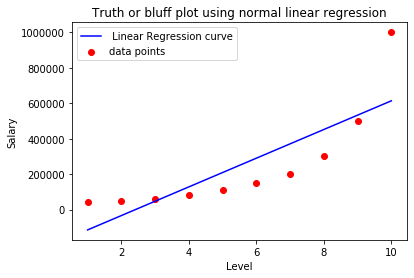

In [32]:
plt.scatter(X,y,color='red',label='data points') #Creates a scatter plot for the dependent and independent variables
plt.plot(X,y_pred,color='blue',label=' Linear Regression curve') #creates a line plot with independent and predicted values using linear regression. 
plt.title('Truth or bluff plot using normal linear regression') #Gives title to the plot
plt.xlabel('Level') #gives title to the 'X axis'.
plt.ylabel('Salary') #gives title to the 'Y axis'.
plt.legend()#Adds legend to the plot.
plt.show() #Used to visualize within the notebook.

As we can see the linear regression plot does not has a good fit line for our data points 

ii)Ploting using polynomial linear regression :

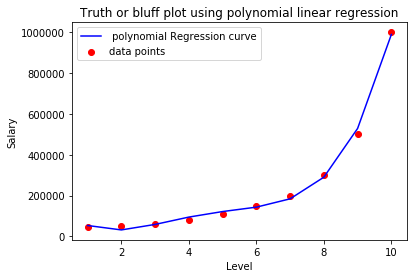

In [33]:
plt.scatter(X,y,color='red',label='data points') #Creates a scatter plot for the dependent and independent variables
plt.plot(X,lr2.predict(pr.fit_transform(X)),color='blue',label=' polynomial Regression curve') #creates a line plot with independent and predicted values using linear regression.
plt.title('Truth or bluff plot using polynomial linear regression') #Gives title to the plot
plt.xlabel('Level') #gives title to the 'X axis'.
plt.ylabel('Salary') #gives title to the 'Y axis'.
plt.legend() #Adds legend to the plot.
plt.show() #Used to visualize within the notebook.

# Predicting the results :

i)Using Linear regression:

In [34]:
#Predicting the past salary of the employee using normal linear regression method. 
print('The salary of the employee for 6.5 years of experience :$',float(lr.predict([[6.5]])))

The salary of the employee for 6.5 years of experience :$ 330378.7878787879


As from the above results we assume that the employee is telling bluff regarding his/her salary that they got from their past company but the actual truth is derived by predicting using the polynomial linear regression

ii)Using Polynomial Linear regrssion:

In [35]:
#Predicting the past salary of the employee using normal Polynomial regression method.
print('The salary of the employee for 6.5 years of experience : $',float(lr2.predict(pr.fit_transform([[6.5]]))))

The salary of the employee for 6.5 years of experience : $ 158862.45265152561


And hereby we came to a conclusion that the new employee is actually telling truth about their salary which they had got in their past company which we had predicted through our ploynomial linear regression.

# Model's accuracy

i)Predicting the accuracy of linear regression model : 

In [36]:
print('Our predicted polynomial linear regression has a score of : ',lr.score(y_pred,y)*100,'%')

Our predicted polynomial linear regression has a score of :  -942436152416.1014 %


Since we can able to see that our linear regression model has a bad score which is a negative score.

ii)Predicting the accuracy of ploynomial linear regression model:

In [37]:
print('Our predicted polynomial linear regression has a score of : ',lr2.score(pr.fit_transform(X),y)*100,'%')

Our predicted polynomial linear regression has a score of :  99.73922891706614 %


Using evaluation metrics like MSE,MAE,RMSE :

In [38]:
#Importing Root mean squared error (RMSE) and Mean absolute error (MAE) class from scikit learn library under metrics package. 
from sklearn.metrics import mean_squared_error,mean_absolute_error

iii)Mean squared error (MSE) for linear regression model

In [39]:
#Prints the mean squared error (MSE) for our test data and predicted data.
print(mean_squared_error(y,y_pred))

26695878787.878788


iv)Mean Absolute error (MAE) for linear regression model :

In [40]:
#Prints the mean absolute error (MAE) for our test data and predicted data.
print(mean_absolute_error(y,y_pred))

128454.54545454546


v)Root mean squared error (RMSE) for linear regression model :

In [41]:
#Prints the root mean squared error (RMSE) for our test data and predicted data.
print(np.sqrt(mean_squared_error(y,y_pred)))

163388.73519272613


vi)Mean squared error (MSE) for polynomial linear regression model :

In [42]:
#Prints the mean squared error (MSE) for our test data and predicted data.
print(mean_squared_error(y,y_pred_pr))

210343822.8438184


vii)Mean Absolute error (MAE) for  polynomial linear regression model :

In [43]:
#Prints the mean absolute error (MAE) for our test data and predicted data.
print(mean_absolute_error(y,y_pred_pr))

12681.81818184008


viii)Root mean squared error (RMSE) for polynomial linear regression model :

In [44]:
#Prints the root mean squared error (RMSE) for our test data and predicted data.
print(np.sqrt(mean_squared_error(y,y_pred_pr)))

14503.234909626832


And we come to a conclusion that our polynomial linear regression model has better accuracy than the linear regression model.  